# Tarea. Clase 04

## Variables aleatorias

---

## Equipo 6.
### Integrantes:

* Arellano Juárez Yoshué Bernardino
* Arellanos Balcázar Carlos Japhet
* Chávez Gómez Sandra Fernanda
* Gómez Alba Valeria
* Rasgado Celaya Julio Martín

---

In [1]:
import numpy
import random

import sympy as sp
import numpy.random as npr
import scipy.stats as stats
import matplotlib.pyplot as plt

from IPython.display import Markdown

In [2]:
def printmd(text):
    display(Markdown(text))

$\color{red}{\text{Ejercicio 1.}}$ Verifica que, en efecto, la esperanza y varianza de una variable aleatoria uniforme.

Una variable aleatoria $X$ tiene distribución uniforme discreta en el conjunto $\{x_1,...,x_n\}$ si su función de densidad está dada por
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} \frac{1}{n}, \quad \text{si } x\in \{x_1,...,x_n\} \\
0, \quad \text{e.o.c} \end{cases}$$

Se llama uniforme porque cada uno de sus posibles resultados de $X$ tienene la misma probabilidad.

**Notación:** $X\sim Unif(x_1,...,x_n)$

La esperanza y varianza de $X$, están dadas por:

$$ \mathbb{E}[X] = \sum_{x} xf_X(x) = \frac{x_n + x_1}{2} $$
y 
$$ \text{Var}(X) = \mathbb{E}\left[ (X-\mathbb{E}[X])^2\right] = \frac{(x_n - x_1 + 1)^2 -1}{12}$$

In [3]:
printmd('### Demostración de la esperanza de una distribución uniforme')

x, X = sp.symbols('x X', integer=True)
f = sp.Function('f_X')(x)

x1, xn, n = sp.symbols('x1 x_n n', integer=True)
# nx = xn - x1 + 1

printmd('Función de densidad:')
fX_x = sp.Eq(
    f,
    sp.Piecewise(
        (1 / n, (x >= x1) & (x <= xn)), 
        (0, True)
    )
)
display(fX_x)

fx = 1 / n

printmd('Esperanza de la función:')
E = sp.Function('E')
var_E_X = sp.summation(x * fx, (x, x1, xn))
sym_E_X = sp.Sum(x * fx, (x, x1, xn))
Eq_E_X = sp.Eq(
    E(X), 
    sym_E_X
)
display(Eq_E_X)

Eq_E_X = sp.Eq(
    E(X),
    var_E_X
)
display(Eq_E_X)

var_E_X = sp.simplify(var_E_X)
Eq_E_X = sp.Eq(
    E(X),
    var_E_X
)
display(Eq_E_X)

var_E_X = sp.factor(var_E_X, deep=True)
Eq_E_X = sp.Eq(
    E(X),
    var_E_X
)
display(Eq_E_X)

printmd('Usando $n = x_n - x_1 + 1$')
var_E_X = sp.factor(var_E_X.subs(xn - x1 + 1, n))
Eq_E_X = sp.Eq(
    E(X),
    var_E_X
)
display(Eq_E_X)

### Demostración de la esperanza de una distribución uniforme

Función de densidad:

Eq(f_X(x), Piecewise((1/n, (x >= x1) & (x <= x_n)), (0, True)))

Esperanza de la función:

Eq(E(X), Sum(x/n, (x, x1, x_n)))

Eq(E(X), (-x1**2/2 + x1/2 + x_n**2/2 + x_n/2)/n)

Eq(E(X), (-x1**2 + x1 + x_n**2 + x_n)/(2*n))

Eq(E(X), -(x1 + x_n)*(x1 - x_n - 1)/(2*n))

Usando $n = x_n - x_1 + 1$

Eq(E(X), (x1 + x_n)/2)

In [4]:
printmd('### Demostración de la varianza de una distribución uniforme')
# nx = xn - x1 + 1

printmd('Función de densidad:')
fX_x = sp.Eq(
    f,
    sp.Piecewise(
        (1 / n, (x >= x1) & (x <= xn)), 
        (0, True)
    )
)
display(fX_x)

fx = 1 / n

printmd('Varianza de la función:')
V = sp.Function('V')
Eq_V_X = sp.Eq(
    V(X), 
    E(X - E(X))**2
)
display(Eq_V_X)

Eq_V_X = sp.Eq(
    V(X), 
    E(X**2) - E(X)**2
)
display(Eq_V_X)

# ---------------------------------------------------
printmd('Calculando $E(X^{{2}})$')
E_X2 = sp.Sum(x**2 * fx, (x, x1, xn))
Eq_E_X2 = sp.Eq(
    E(X**2),
    E_X2
)
display(Eq_E_X2)

E_X2 = sp.simplify(E_X2.subs(n, xn - x1 + 1).doit())
Eq_E_X2 = sp.Eq(
    E(X**2),
    E_X2
)
display(Eq_E_X2)

# -----------------------------------------------------
printmd('Calculando $E(X)^{{2}}$')
E2_X = sp.expand(var_E_X**2)
Eq_E2_X = sp.Eq(
    E(X)**2,
    E2_X
)
display(Eq_E2_X)

# -----------------------------------------------------
printmd('Retomando la varianza:')
V_X = E_X2 - E2_X
Eq_V_X = sp.Eq(
    V(X),
    V_X
)
display(Eq_V_X)

V_X = sp.factor(V_X)
Eq_V_X = sp.Eq(
    V(X),
    V_X
)
display(Eq_V_X)

V_X = sp.collect(V_X, x1)
Eq_V_X = sp.Eq(
    V(X),
    V_X
)
display(Eq_V_X)

printmd('Usando $n = x_n - x_1 + 1$')
V_X = sp.ratsimp(V_X.subs(xn - x1 + 1, n))
Eq_V_X = sp.Eq(
    V(X),
    V_X
)
display(Eq_V_X)

### Demostración de la varianza de una distribución uniforme

Función de densidad:

Eq(f_X(x), Piecewise((1/n, (x >= x1) & (x <= x_n)), (0, True)))

Varianza de la función:

Eq(V(X), E(X - E(X))**2)

Eq(V(X), -E(X)**2 + E(X**2))

Calculando $E(X^{{2}})$

Eq(E(X**2), Sum(x**2/n, (x, x1, x_n)))

Eq(E(X**2), x1**2/3 + x1*x_n/3 - x1/6 + x_n**2/3 + x_n/6)

Calculando $E(X)^{{2}}$

Eq(E(X)**2, x1**2/4 + x1*x_n/2 + x_n**2/4)

Retomando la varianza:

Eq(V(X), x1**2/12 - x1*x_n/6 - x1/6 + x_n**2/12 + x_n/6)

Eq(V(X), (x1 - x_n)*(x1 - x_n - 2)/12)

Eq(V(X), (x1 - x_n)*(x1 - x_n - 2)/12)

Usando $n = x_n - x_1 + 1$

Eq(V(X), n**2/12 - 1/12)

$\color{red}{\text{Ejercicio 2.}}$ Calcular la esperanza y varianza.    

**Ejemplo** Se lleva a cabo una rifa donde los boletos están enumerados del $00$ al $99$. Si $Y$ es la variable aleatoria definida como el número del boleto ganador, entonces:  
$$\mathbb{P}(Y=k)=\begin{cases}
	\frac{1}{100} &\quad \text{si } k=00,01,\dots,99 \\
	0 &\quad \text{en otro caso}
\end{cases}$$
Consideremos que el premio de la rifa se determina a partir del número premiado de la siguiente forma: $X=Y+1$, donde $X$ es el monto del premio en pesos y $Y$ es el número premiado, entonces $X$ es una variable aleatoria, pues es una función de $Y$, y además se tiene
	$$f_{X}(k)=\begin{cases}
		\frac{1}{100} &\quad \text{si } x=1,2,\dots,100 \\
		0 &\quad \text{en otro caso}
	\end{cases}$$

In [5]:
def UnifE(x1, xn):
    n = xn - x1 + 1
    return (x1 + xn) / n

def UnifV(x1, xn):
    n = xn - x1 + 1
    return (n**2 - 1) / 12

In [6]:
x1, xn = 1, 100

Ex = UnifE(x1, xn)
Vx = UnifV(x1, xn)

print(f'Esperanza: {Ex:.3f}')
print(f'Varianza: {Vx:.3f}')

Esperanza: 1.010
Varianza: 833.250


Es una distribución de probabilidad discreta que sirve para calcular la probabilidad de que ocurra un determinado número de eventos raros durante un intervalo dado (puede ser tiempo, lingitud, área, etc).

Esta v.a. tomavalores sobre el conjunto $\{0,1,2,...\}$ y tiene un parámetro $\lambda>0$, el cual representa el número de veces que se **espera** que ocurra un evento durante un intervalo dado.

Su función de densidad, está dado como sigue:
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} e^{-\lambda}\frac{\lambda^x}{x!}, \quad \text{si } x\in \{0,1,...\} \\
0, \quad \text{e.o.c} \end{cases}$$

Notemos que $\mathbb{E}[X]=\lambda$ y que $\text{Var}(X)=\lambda$. 

**Ejemplo** Supongamos que el número de accidentes que ocurre en un punto en un día tiene distribución Poisson con parámetro $\lambda=2$, 

- ¿cuál es la probabilidad de que en un día ocurran más de dos accidentes?
  $$ \begin{align*} \mathbb{P}(X>2) &= 1- \mathbb{P}(X\le 2) \\
    &= 1- [\mathbb{P}(X=0) + \mathbb{P}(X=1) + \mathbb{P}(X=2)] \\
    &= 1- \left[ e^{-2}\frac{2^0}{0!} + e^{-2}\frac{2^1}{1!} + e^{-2}\frac{2^2}{2!} \right] \\
    &= 1 - e^{-2}[1+2+2] = 1-5e^{-2} = 0.3233
    \end{align*} $$
- ¿cuál es la probabilidad de que ocurran más de dos accidentes sabiendo que por lo menos ocurre uno?
  $$ \begin{align*} \mathbb{P}(X>2 \mid X \ge 1) &= \frac{\mathbb{P}(\{X>2\} \cap \{X \ge 1\} )}{\mathbb{P}\{X \ge 1)\}} \\
       &= \frac{\mathbb{P}(\{X>2\})}{\mathbb{P}\{X \ge 1)\}} \\
       & = \frac{.3233}{1-\mathbb{P}(X<1)} = \frac{0.3233}{1-e^{-2}} \frac{0.3233}{.8646} = 0.3739
       \end{align*} $$

$\color{red}{\text{Ejercicio 3.}}$ Usando el atributo `.cdf` [Poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) calcula las probabilidades anteriores.

In [7]:
lam = 2
P_2 = stats.poisson.cdf(2, lam)
P_may2 = 1 - P_2

printmd(f'$P(X > 2) = {P_may2:.3f}$')

P_1 = stats.poisson.cdf(0, lam)
P_may1 = 1 - P_1
P_2_1 = P_may2 / P_may1

printmd(f'$P(X > 2 \\mid X\\geq 1) = {P_2_1:.3f}$')

$P(X > 2) = 0.323$

$P(X > 2 \mid X\geq 1) = 0.374$

$\color{red}{\text{Ejercicio 4.}}$ Un examen de Estadística consta de 20 preguntas tipo test y se conoce de experiencias
anteriores que un alumno tiene probabilidad 0.7 de contestar bien cada pregunta. Obtener:

a) La probabilidad de que la primera pregunta que contesta bien sea la cuarta.

b) Sabiendo que para aprobar el examen es necesario contestar bien a 10 preguntas, ¿cuál es la probabilidad de que apruebe al contestar la pregunta duodécima?

In [8]:
p = 0.7

printmd('Inciso a (dist. geom.):')

P_4 = stats.geom.pmf(4, p)

printmd(f'$P(X = 4) = {P_4:.3f}$')

printmd('Inciso b (dist. neg-binom.):')

r = 10

P_12 = stats.nbinom.pmf(2, r, p)
printmd(f'$P(X = 12) = {P_12:.3f}$')

Inciso a (dist. geom.):

$P(X = 4) = 0.019$

Inciso b (dist. neg-binom.):

$P(X = 12) = 0.140$

$\color{red}{\text{Ejercicio 5.}}$ Investigue sobre el problema de la caja de cerillos de Banach y explique su solución.

---

El problema de Banach establece que un fumador compra 2 cajas de cerillos con $N$ cantidad de cerillos cada una. Después de un tiempo, al sacar abrir de las cajas, la encuentra vacía. Por ende, se plantea cuál sería la probabilidad de que en la otra caja de cerillos aún queden $k$ cantidad de cerillos.

La solución de este problema viene de establecer la solución considerando que, para que queden $k$ cantidad de cerillos en una caja, la otra debió ser escogida $N - k$ veces. Esto se condensa en una distribución binomial $X \sim NB(N - k, 1/2)$, donde el $1/2$ resulta de saber que la probabilidad de cualquiera de las dos cajas para ser escogidas es del $50\%$. Dicho esto, la función de probabilidad resulta en:

$$
P(X = N - k) = {2N - k \choose N - k}\left(\frac{1}{2}\right)^{2N - k + 1}
$$

Pero, considerando que esto aplica tanto para la primera caja como para la segunda, se duplica esta función de probabilidad, resultando en:

$$
P(X = N - k) = {2N - k \choose N - k}\left(\frac{1}{2}\right)^{2N - k}
$$

$\color{red}{\text{Ejercicio 6.}}$ Replicar la grafica de la función de densidad

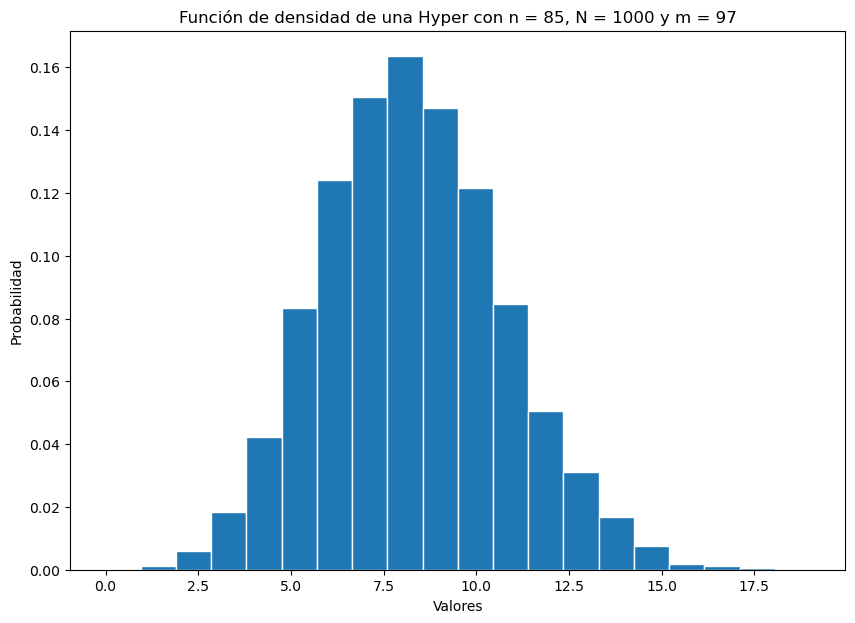

In [9]:
n = 85
N = 1000
m = 97
size = 10000

random.seed(10)
rand_hyper = stats.hypergeom.rvs(N, n, m, size=size)

plt.figure(figsize=(10, 7))
plt.hist(rand_hyper, density=True, bins=len(numpy.unique(rand_hyper)), 
         color='tab:blue', edgecolor='white')

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title(f'Función de densidad de una Hyper con n = {n}, N = {N} y m = {m}')
plt.show()

$\color{red}{\text{Ejercicio 7.}}$ Una compañía petrolera realiza un estudio geológico que indica que un pozo petrolero exploratorio debería tener un 20% de posibilidades de encontrar petróleo.

- ¿Cuál es la probabilidad de que el primer pozo se produzca en el tercer pozo perforado?

- ¿Cuál es la probabilidad de que el tercer pozo se produzca en el séptimo pozo perforado?

- ¿Cuál es la media y la varianza del número de pozos que se deben perforar si la compañía petrolera quiere establecer tres pozos productores?

In [10]:
p = 0.2

printmd('Inciso a (dist. geom.):')

P_3 = stats.geom.pmf(3, p)
printmd(f'$P(X = 3) = {P_3:.3f}$')

printmd('Inciso b (dist. neg-binom.):')
r = 3 
x = 7

P_7 = stats.nbinom.pmf(x - r, r, p)
printmd(f'$P(X = 7) = {P_7:.3f}$')

printmd('Inciso c (dist. neg-binom.):')

media = r / p
varianza = r * (1 - p) / p**2

printmd(f'$\\mu = {media}$')
printmd(f'$\\sigma = {varianza}$')


Inciso a (dist. geom.):

$P(X = 3) = 0.128$

Inciso b (dist. neg-binom.):

$P(X = 7) = 0.049$

Inciso c (dist. neg-binom.):

$\mu = 15.0$

$\sigma = 60.0$